In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sales_df = pd.read_csv("/Users/anastasia/Downloads/saas_sales_operations_data.csv")
customer_df = pd.read_csv("/Users/anastasia/Downloads/saas_customer_interactions.csv")
display(sales_df.head())
display(customer_df.head())

,Customer_ID,Customer_Segment,Region,Subscription_Plan,Monthly_Revenue,Monthly_Profit,Customer_Satisfaction,Active_Users,Engagement_Level,Account_Manager,Renewal_Status,Signup_Date
0,CUST0001,Enterprise,North America,Pro,4874.05,3307.52,1.0,165.0,Medium,Manager A,Churned,2021-08-05
1,CUST0002,SMB,South America,Enterprise,2811.46,1953.30,3.0,45.0,High,Manager D,Churned,2021-04-27
2,CUST0003,SMB,Africa,Enterprise,3517.35,3235.63,5.0,200.0,Medium,Manager D,Churned,2021-07-18
3,CUST0004,Enterprise,North America,Enterprise,718.77,2998.91,1.0,176.0,High,Manager B,Renewed,2021-09-21
4,CUST0005,Mid-Market,North America,Pro,4355.46,1387.93,3.0,119.0,Medium,Manager C,Churned,2021-08-14


,Customer_ID,Interaction_Type,Interaction_Date,Issue_Resolved,Followup_CSAT_Score,Account_Manager
0,CUST0203,Product Demo,2023-06-24,No,NaN,Manager C
1,CUST0255,Support Call,2023-02-03,No,3.0,Manager A
2,CUST0016,QBR,2023-07-18,No,4.0,Manager B
3,CUST0196,QBR,2023-07-18,Yes,NaN,Manager D
4,CUST0219,Support Call,2023-06-28,No,1.0,Manager C


In [5]:
merged_df = pd.merge(sales_df, customer_df, on="Customer_ID", how="inner")
merged_df.head()

,Customer_ID,Customer_Segment,Region,Subscription_Plan,Monthly_Revenue,Monthly_Profit,Customer_Satisfaction,Active_Users,Engagement_Level,Account_Manager_x,Renewal_Status,Signup_Date,Interaction_Type,Interaction_Date,Issue_Resolved,Followup_CSAT_Score,Account_Manager_y
0,CUST0001,Enterprise,North America,Pro,4874.05,3307.52,1.0,165.0,Medium,Manager A,Churned,2021-08-05,Upsell Meeting,2023-10-26,Yes,NaN,Manager A
1,CUST0001,Enterprise,North America,Pro,4874.05,3307.52,1.0,165.0,Medium,Manager A,Churned,2021-08-05,Support Call,2023-07-24,No,1.0,Manager C
2,CUST0006,SMB,Africa,Enterprise,2505.31,504.92,4.0,179.0,Medium,Manager A,Churned,2021-11-16,Product Demo,2023-12-28,Yes,NaN,Manager D
3,CUST0010,SMB,Europe,Pro,2258.30,3447.56,3.0,35.0,High,Manager C,Churned,2021-10-01,Support Call,2023-04-02,No,4.0,Manager B
4,CUST0011,Enterprise,South America,Pro,1003.38,2910.66,3.0,17.0,Low,Manager C,Renewed,2021-04-10,Renewal Meeting,2023-11-01,No,3.0,Manager C


In [7]:
merged_df = merged_df.set_index(["Customer_Segment", "Region"])
merged_df.head()

Customer_ID Subscription_Plan  Monthly_Revenue  \
Customer_Segment Region                                                         
Enterprise       North America    CUST0001               Pro          4874.05   
                 North America    CUST0001               Pro          4874.05   
SMB              Africa           CUST0006        Enterprise          2505.31   
                 Europe           CUST0010               Pro          2258.30   
Enterprise       South America    CUST0011               Pro          1003.38   

                                Monthly_Profit  Customer_Satisfaction  \
Customer_Segment Region                                                 
Enterprise       North America         3307.52                    1.0   
                 North America         3307.52                    1.0   
SMB              Africa                 504.92                    4.0   
                 Europe                3447.56                    3.0   
Enterprise       South America         2910.66                    3.0   

                                Active_Users Engagement_Level  \
Customer_Segment Region                                         
Enterprise       North America         165.0           Medium   
                 North America         165.0           Medium   
SMB              Africa                179.0           Medium   
                 Europe                 35.0             High   
Enterprise       South America          17.0              Low   

                               Account_Manager_x Renewal_Status Signup_Date  \
Customer_Segment Region                                                       
Enterprise       North America         Manager A        Churned  2021-08-05   
                 North America         Manager A        Churned  2021-08-05   
SMB              Africa                Manager A        Churned  2021-11-16   
                 Europe                Manager C        Churned  2021-10-01   
Enterprise       South America         Manager C        Renewed  2021-04-10   

                               Interaction_Type Interaction_Date  \
Customer_Segment Region                                            
Enterprise       North America   Upsell Meeting       2023-10-26   
                 North America     Support Call       2023-07-24   
SMB              Africa            Product Demo       2023-12-28   
                 Europe            Support Call       2023-04-02   
Enterprise       South America  Renewal Meeting       2023-11-01   

                               Issue_Resolved  Followup_CSAT_Score  \
Customer_Segment Region                                              
Enterprise       North America            Yes                  NaN   
                 North America             No                  1.0   
SMB              Africa                   Yes                  NaN   
                 Europe                    No                  4.0   
Enterprise       South America             No                  3.0   

                               Account_Manager_y  
Customer_Segment Region                           
Enterprise       North America         Manager A  
                 North America         Manager C  
SMB              Africa                Manager D  
                 Europe                Manager B  
Enterprise       South America         Manager C

In [31]:
africa_data = merged_df.loc[("SMB", "Africa")]
display(africa_data)

/var/folders/68/p6tbj3yj42n58fkdzr4c1br00000gn/T/ipykernel_12831/1524832166.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  africa_data = merged_df.loc[("SMB", "Africa")]


Customer_ID Subscription_Plan  Monthly_Revenue  \
Customer_Segment Region                                                  
SMB              Africa    CUST0006        Enterprise          2505.31   
                 Africa    CUST0032             Basic          4314.82   
                 Africa    CUST0096             Basic          3210.45   
                 Africa    CUST0097               Pro          2509.46   
                 Africa    CUST0139        Enterprise          2361.09   
                 Africa    CUST0187               Pro           281.40   
                 Africa    CUST0215               Pro          4612.55   
                 Africa    CUST0272               Pro          4530.36   
                 Africa    CUST0291             Basic          1546.04   
                 Africa    CUST0291             Basic          1546.04   

                         Monthly_Profit  Customer_Satisfaction  Active_Users  \
Customer_Segment Region                                                        
SMB              Africa          504.92                    4.0         179.0   
                 Africa          299.71                    NaN          74.0   
                 Africa         3170.44                    NaN           8.0   
                 Africa          989.83                    NaN          37.0   
                 Africa         2897.32                    4.0          68.0   
                 Africa         3719.88                    2.0         120.0   
                 Africa         2664.66                    NaN         142.0   
                 Africa         2064.31                    5.0         147.0   
                 Africa         2279.74                    NaN          16.0   
                 Africa         2279.74                    NaN          16.0   

                        Engagement_Level Account_Manager_x Renewal_Status  \
Customer_Segment Region                                                     
SMB              Africa           Medium         Manager A        Churned   
                 Africa              Low         Manager A        Renewed   
                 Africa             High         Manager C        Renewed   
                 Africa             High         Manager A        Renewed   
                 Africa             High         Manager B        Churned   
                 Africa             High         Manager B        Churned   
                 Africa           Medium         Manager C        Churned   
                 Africa           Medium         Manager A        Churned   
                 Africa             High         Manager C        Renewed   
                 Africa             High         Manager C        Renewed   

                        Signup_Date Interaction_Type Interaction_Date  \
Customer_Segment Region                                                 
SMB              Africa  2021-11-16     Product Demo       2023-12-28   
                 Africa  2021-02-15     Product Demo       2023-07-21   
                 Africa  2021-03-28  Renewal Meeting       2023-12-20   
                 Africa  2021-05-03     Support Call       2023-12-03   
                 Africa  2021-12-13  Renewal Meeting       2023-08-25   
                 Africa  2021-11-03     Product Demo       2023-01-17   
                 Africa  2021-08-17              QBR       2023-03-20   
                 Africa  2021-01-08              QBR       2023-06-27   
                 Africa  2021-03-25              QBR       2023-08-19   
                 Africa  2021-03-25   Upsell Meeting       2023-04-11   

                        Issue_Resolved  Followup_CSAT_Score Account_Manager_y  
Customer_Segment Region                                                        
SMB              Africa            Yes                  NaN         Manager D  
                 Africa            Yes                  3.0         Manager B  
                 Africa            Yes              

In [17]:
numeric_data = merged_df.select_dtypes(include=[np.number])
grouped_data = numeric_data.groupby(level=[0, 1]).mean()
display(grouped_data)

Monthly_Revenue  Monthly_Profit  \
Customer_Segment Region                                           
Enterprise       Africa             3558.090000     2599.153333   
                 Asia               2408.260667     1989.685333   
                 Europe             2902.114286     1910.391429   
                 North America      4063.154286     2102.350000   
                 South America      2560.550000     1789.556250   
Mid-Market       Africa             2167.470000     1890.462500   
                 Asia               2191.320000     2704.700000   
                 Europe             2835.963333     1653.955000   
                 North America      2329.060000     1952.991818   
                 South America      1990.853333     1732.931667   
SMB              Africa             2741.752000     2087.055000   
                 Asia               2787.164615     1706.262308   
                 Europe             2285.473158     2272.025263   
                 North America      2305.141429     2174.419286   
                 South America      3511.445833     1889.478333   

                                Customer_Satisfaction  Active_Users  \
Customer_Segment Region                                               
Enterprise       Africa                      2.000000    120.000000   
                 Asia                        4.230769     95.928571   
                 Europe                      2.333333    114.428571   
                 North America               3.000000    118.285714   
                 South America               3.571429     96.687500   
Mid-Market       Africa                      2.833333    126.375000   
                 Asia                        2.333333     11.000000   
                 Europe                      3.200000     87.833333   
                 North America               3.200000    121.272727   
                 South America               2.600000     92.833333   
SMB              Africa                      3.750000     80.700000   
                 Asia                        3.125000    112.538462   
                 Europe                      4.000000     84.263158   
                 North America               3.375000     80.076923   
                 South America               4.555556     87.500000   

                                Followup_CSAT_Score  
Customer_Segment Region                              
Enterprise       Africa                    3.000000  
                 Asia                      3.307692  
                 Europe                    2.166667  
                 North America             2.250000  
                 South America             3.000000  
Mid-Market       Africa                    2.571429  
                 Asia                      3.000000  
                 Europe                    3.400000  
                 North America             3.111111  
                 South America             3.250000  
SMB              Africa                    3.750000  
                 Asia                      3.428571  
                 Europe                    3.400000  
                 North America             2.916667  
                 South America             2.727273

In [19]:
grouped_data.corr()

,Monthly_Revenue,Monthly_Profit,Customer_Satisfaction,Active_Users,Followup_CSAT_Score
Monthly_Revenue,1.000000,0.090122,-0.008837,0.333706,-0.408211
Monthly_Profit,0.090122,1.000000,-0.316641,-0.466125,-0.059477
Customer_Satisfaction,-0.008837,-0.316641,1.000000,-0.061673,0.332639
Active_Users,0.333706,-0.466125,-0.061673,1.000000,-0.293405
Followup_CSAT_Score,-0.408211,-0.059477,0.332639,-0.293405,1.000000


In [23]:
totals = numeric_data.groupby(level=[0,1]).sum()
display(totals)

Monthly_Revenue  Monthly_Profit  \
Customer_Segment Region                                           
Enterprise       Africa                10674.27         7797.46   
                 Asia                  36123.91        29845.28   
                 Europe                20314.80        13372.74   
                 North America         28442.08        14716.45   
                 South America         40968.80        28632.90   
Mid-Market       Africa                17339.76        15123.70   
                 Asia                   6573.96         8114.10   
                 Europe                17015.78         9923.73   
                 North America         25619.66        21482.91   
                 South America         11945.12        10397.59   
SMB              Africa                27417.52        20870.55   
                 Asia                  36233.14        22181.41   
                 Europe                43423.99        43168.48   
                 North America         32271.98        30441.87   
                 South America         42137.35        22673.74   

                                Customer_Satisfaction  Active_Users  \
Customer_Segment Region                                               
Enterprise       Africa                           6.0         360.0   
                 Asia                            55.0        1343.0   
                 Europe                          14.0         801.0   
                 North America                   21.0         828.0   
                 South America                   50.0        1547.0   
Mid-Market       Africa                          17.0        1011.0   
                 Asia                             7.0          33.0   
                 Europe                          16.0         527.0   
                 North America                   32.0        1334.0   
                 South America                   13.0         557.0   
SMB              Africa                          15.0         807.0   
                 Asia                            25.0        1463.0   
                 Europe                          64.0        1601.0   
                 North America                   27.0        1041.0   
                 South America                   41.0        1050.0   

                                Followup_CSAT_Score  
Customer_Segment Region                              
Enterprise       Africa                         9.0  
                 Asia                          43.0  
                 Europe                        13.0  
                 North America                  9.0  
                 South America                 33.0  
Mid-Market       Africa                        18.0  
                 Asia                           9.0  
                 Europe                        17.0  
                 North America                 28.0  
                 South America                 13.0  
SMB              Africa                        30.0  
                 Asia                          24.0  
                 Europe                        51.0  
                 North America                 35.0  
                 South America                 30.0

In [33]:
enterprise_data = merged_df.xs("Enterprise", level="Customer_Segment")
display(enterprise_data)

,Customer_ID,Subscription_Plan,Monthly_Revenue,Monthly_Profit,Customer_Satisfaction,Active_Users,Engagement_Level,Account_Manager_x,Renewal_Status,Signup_Date,Interaction_Type,Interaction_Date,Issue_Resolved,Followup_CSAT_Score,Account_Manager_y
Region,,,,,,,,,,,,,,,
North America,CUST0001,Pro,4874.05,3307.52,1.0,165.0,Medium,Manager A,Churned,2021-08-05,Upsell Meeting,2023-10-26,Yes,NaN,Manager A
North America,CUST0001,Pro,4874.05,3307.52,1.0,165.0,Medium,Manager A,Churned,2021-08-05,Support Call,2023-07-24,No,1.0,Manager C
South America,CUST0011,Pro,1003.38,2910.66,3.0,17.0,Low,Manager C,Renewed,2021-04-10,Renewal Meeting,2023-11-01,No,3.0,Manager C
South America,CUST0012,Pro,351.75,3920.77,1.0,184.0,Medium,Manager D,Renewed,2021-01-09,Support Call,2023-05-07,No,2.0,Manager D
South America,CUST0015,Pro,4128.37,1494.81,5.0,10.0,Low,Manager D,Churned,2021-08-19,Renewal Meeting,2023-10-15,No,5.0,Manager C
Asia,CUST0029,Enterprise,2660.61,2267.56,5.0,193.0,High,Manager D,Churned,2021-04-10,Support Call,2023-01-08,No,1.0,Manager D
Asia,CUST0029,Enterprise,2660.61,2267.56,5.0,193.0,High,Manager D,Churned,2021-04-10,QBR,2023-04-09,No,NaN,Manager B
Europe,CUST0030,Basic,2307.52,3665.26,4.0,166.0,High,Manager D,Churned,2021-01-15,Support Call,2023-08-25,Yes,4.0,Manager D
Africa,CUST0038,Basic,4743.19,3787.73,1.0,70.0,Medium,Manager C,Renewed,2021-11-14,QBR,2023-11-27,No,4.0,Manager D


In [39]:
enterprise_na_data = merged_df.xs(("Enterprise", "North America"), level=["Customer_Segment", "Region"])
display(enterprise_na_data)

Customer_ID Subscription_Plan  Monthly_Revenue  \
Customer_Segment Region                                                         
Enterprise       North America    CUST0001               Pro          4874.05   
                 North America    CUST0001               Pro          4874.05   
                 North America    CUST0122             Basic          3164.50   
                 North America    CUST0122             Basic          3164.50   
                 North America    CUST0184               Pro          4121.66   
                 North America    CUST0184               Pro          4121.66   
                 North America    CUST0184               Pro          4121.66   

                                Monthly_Profit  Customer_Satisfaction  \
Customer_Segment Region                                                 
Enterprise       North America         3307.52                    1.0   
                 North America         3307.52                    1.0   
                 North America          340.29                    5.0   
                 North America          340.29                    5.0   
                 North America         2473.61                    3.0   
                 North America         2473.61                    3.0   
                 North America         2473.61                    3.0   

                                Active_Users Engagement_Level  \
Customer_Segment Region                                         
Enterprise       North America         165.0           Medium   
                 North America         165.0           Medium   
                 North America          36.0           Medium   
                 North America          36.0           Medium   
                 North America         142.0              Low   
                 North America         142.0              Low   
                 North America         142.0              Low   

                               Account_Manager_x Renewal_Status Signup_Date  \
Customer_Segment Region                                                       
Enterprise       North America         Manager A        Churned  2021-08-05   
                 North America         Manager A        Churned  2021-08-05   
                 North America         Manager B        Churned  2021-06-12   
                 North America         Manager B        Churned  2021-06-12   
                 North America         Manager D        Renewed  2021-06-13   
                 North America         Manager D        Renewed  2021-06-13   
                 North America         Manager D        Renewed  2021-06-13   

                               Interaction_Type Interaction_Date  \
Customer_Segment Region                                            
Enterprise       North America   Upsell Meeting       2023-10-26   
                 North America     Support Call       2023-07-24   
                 North America     Support Call       2023-02-22   
                 North America     Product Demo       2023-03-24   
                 North America     Product Demo       2023-05-12   
                 North America     Product Demo       2023-01-17   
                 North America     Support Call       2023-06-16   

                               Issue_Resolved  Followup_CSAT_Score  \
Customer_Segment Region                                              
Enterprise       North America            Yes                  NaN   
                 North America             No                  1.0   
                 North America             No                  NaN   
                 North America             No                  5.0   
                 North America            Yes                  2.0   
                 North America            Yes                  1.0   
                 North America            Yes                  NaN   

                               Account_Manager_y  
Customer_Segment Region                           

In [49]:
europe_enterprise = merged_df.loc[("Enterprise","Europe")]
display(europe_enterprise)

/var/folders/68/p6tbj3yj42n58fkdzr4c1br00000gn/T/ipykernel_12831/795321490.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  europe_enterprise = merged_df.loc[("Enterprise","Europe")]


Customer_ID Subscription_Plan  Monthly_Revenue  \
Customer_Segment Region                                                  
Enterprise       Europe    CUST0030             Basic          2307.52   
                 Europe    CUST0054               Pro          4627.16   
                 Europe    CUST0089             Basic           297.14   
                 Europe    CUST0089             Basic           297.14   
                 Europe    CUST0158        Enterprise          4677.82   
                 Europe    CUST0177             Basic          3900.17   
                 Europe    CUST0282               Pro          4207.85   

                         Monthly_Profit  Customer_Satisfaction  Active_Users  \
Customer_Segment Region                                                        
Enterprise       Europe         3665.26                    4.0         166.0   
                 Europe         1662.06                    4.0          22.0   
                 Europe          621.52                    1.0         164.0   
                 Europe          621.52                    1.0         164.0   
                 Europe         2247.66                    NaN         175.0   
                 Europe         1501.87                    1.0          32.0   
                 Europe         3052.85                    3.0          78.0   

                        Engagement_Level Account_Manager_x Renewal_Status  \
Customer_Segment Region                                                     
Enterprise       Europe             High         Manager D        Churned   
                 Europe             High         Manager D        Renewed   
                 Europe           Medium         Manager A        Renewed   
                 Europe           Medium         Manager A        Renewed   
                 Europe             High         Manager B        Churned   
                 Europe             High         Manager C        Renewed   
                 Europe           Medium         Manager A        Renewed   

                        Signup_Date Interaction_Type Interaction_Date  \
Customer_Segment Region                                                 
Enterprise       Europe  2021-01-15     Support Call       2023-08-25   
                 Europe  2021-11-05     Support Call       2023-05-28   
                 Europe  2021-08-01     Support Call       2023-05-17   
                 Europe  2021-08-01  Renewal Meeting       2023-08-17   
                 Europe  2021-11-20   Upsell Meeting       2023-12-01   
                 Europe  2021-02-21   Upsell Meeting       2023-08-28   
                 Europe  2021-11-05  Renewal Meeting       2023-09-12   

                        Issue_Resolved  Followup_CSAT_Score Account_Manager_y  
Customer_Segment Region                                                        
Enterprise       Europe            Yes                  4.0         Manager D  
                 Europe            Yes                  5.0         Manager B  
                 Europe            Yes                  1.0         Manager D  
                 Europe             No                  1.0         Manager B  
                 Europe            Yes                  1.0         Manager D  
                 Europe            Yes                  NaN         Manager D  
                 Europe             No                  1.0         Manager B

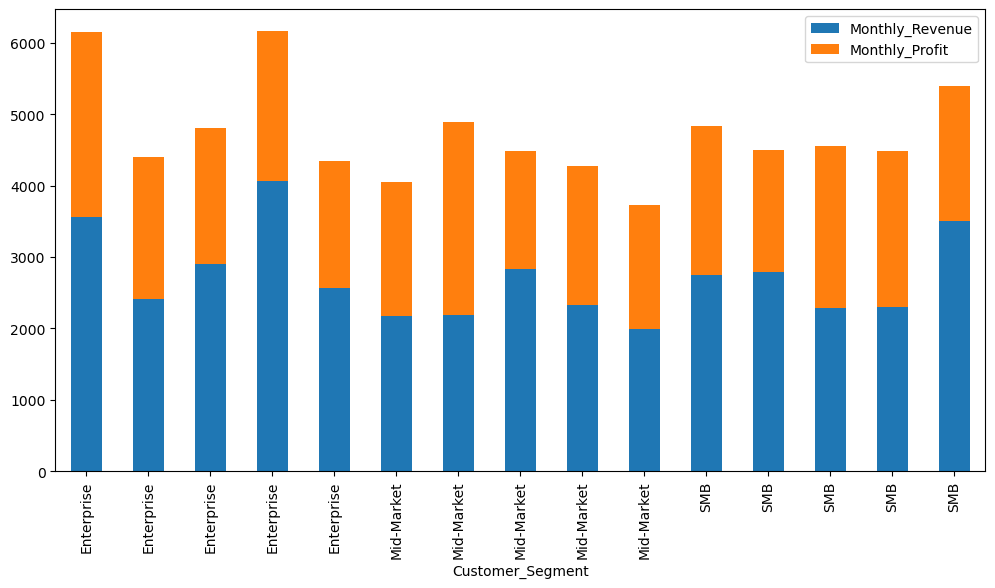

In [61]:
segment_region_summary = merged_df.groupby(["Customer_Segment", "Region"])[["Monthly_Revenue", "Monthly_Profit"]].mean()
segment_region_summary = segment_region_summary.reset_index()
fig, ax = plt.subplots(figsize=(12,6))
segment_region_summary.plot(x="Customer_Segment", kind="bar", ax=ax, stacked=True)
plt.show()
# not good - doesn't show everything we want. Create a pivot table first and then use that df to create the graph

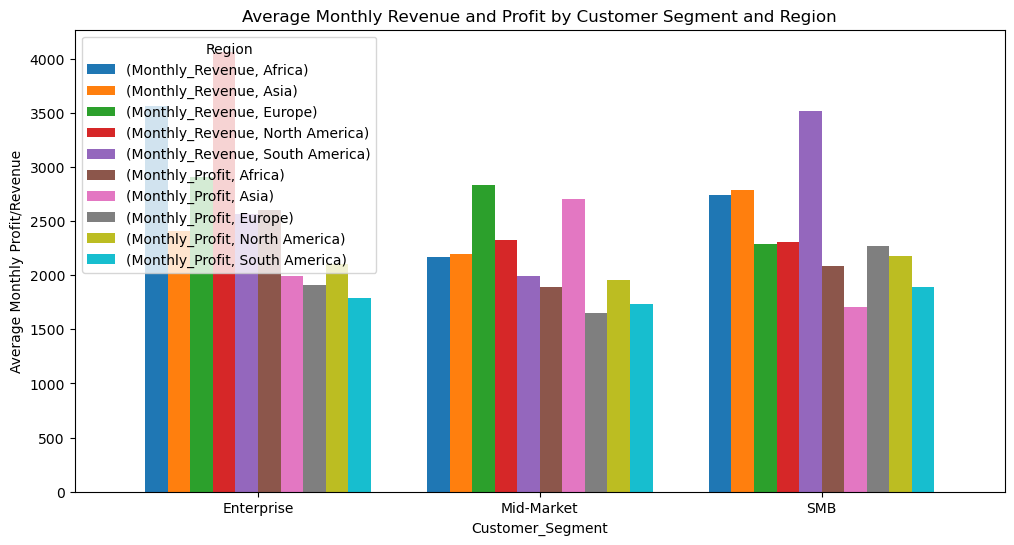

In [87]:
pivot_df = segment_region_summary.pivot(index="Customer_Segment", columns="Region", values=["Monthly_Revenue", "Monthly_Profit"])
pivot_df.plot(kind="bar", figsize=(12,6), width=0.8)
plt.title("Average Monthly Revenue and Profit by Customer Segment and Region")
plt.ylabel("Average Monthly Profit/Revenue")
plt.xlabel("Customer_Segment")
plt.xticks(rotation=0)
plt.legend(title="Region", loc="upper left")
plt.show()
#ugly, cluttered. Separate Rev and Profit

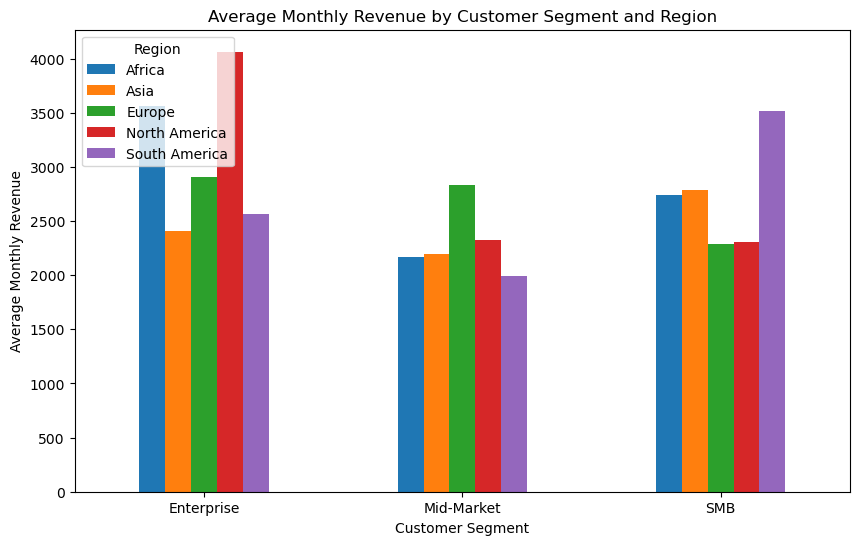

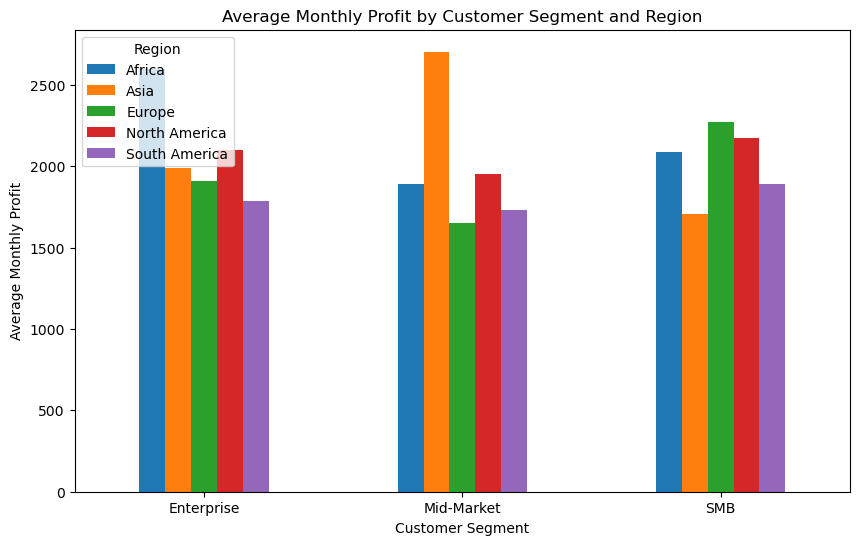

In [89]:
pivot_revenue = segment_region_summary.pivot(index="Customer_Segment", columns="Region", values="Monthly_Revenue")
pivot_revenue.plot(kind="bar", figsize=(10, 6))
plt.title("Average Monthly Revenue by Customer Segment and Region")
plt.xlabel("Customer Segment")
plt.ylabel("Average Monthly Revenue")
plt.xticks(rotation=0)
plt.legend(title="Region", loc="upper left")
plt.show()

pivot_profit = segment_region_summary.pivot(index="Customer_Segment", columns="Region", values="Monthly_Profit")
pivot_profit.plot(kind="bar", figsize=(10, 6))
plt.title("Average Monthly Profit by Customer Segment and Region")
plt.xlabel("Customer Segment")
plt.ylabel("Average Monthly Profit")
plt.xticks(rotation=0)
plt.legend(title="Region", loc="upper left")
plt.show()

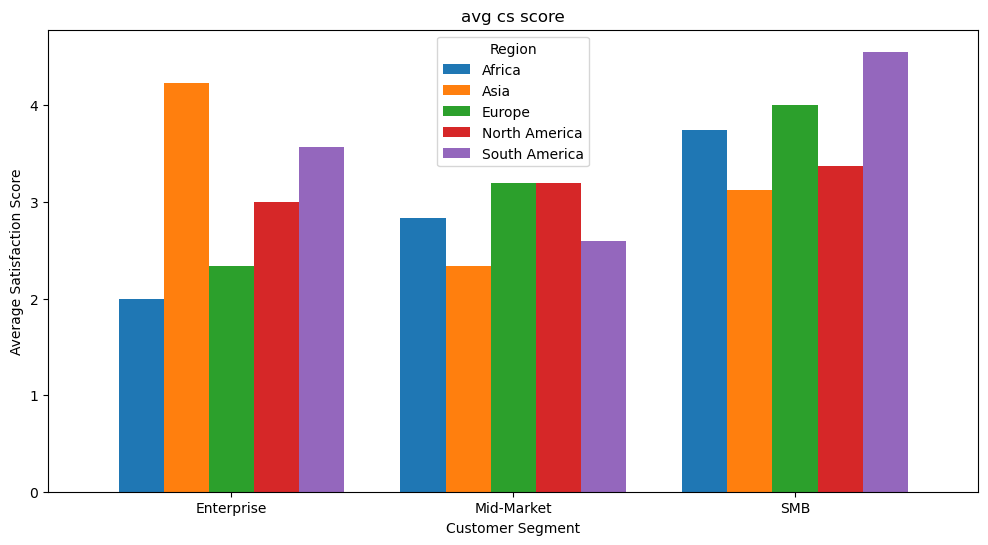

In [107]:
segment_region_customer = merged_df.groupby(["Customer_Segment", "Region"])[["Customer_Satisfaction"]].mean()
pivot_src = segment_region_customer.reset_index().pivot(index="Customer_Segment", columns="Region", values="Customer_Satisfaction")
pivot_src.plot(kind="bar", figsize=(12,6), width=0.8)
plt.xlabel("Customer Segment")
plt.ylabel("Average Satisfaction Score")
plt.title("avg cs score")
plt.xticks(rotation=0)
plt.show()
                                        